<a href="https://colab.research.google.com/github/junwon-seo/junwon-seo.github.io/blob/master/Figures_for_the_Balling_up_paper_(TMS_24_%2B_MS%26T24_prep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paper itself

In [ ]:
#@title 1 Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from google.colab import files, drive
import cv2 as cv
import seaborn as sns
import matplotlib.colors as mcolors
from PIL import Image
drive.mount('/content/drive')
#uploaded = files.upload()
!pip install brokenaxes

Mounted at /content/drive


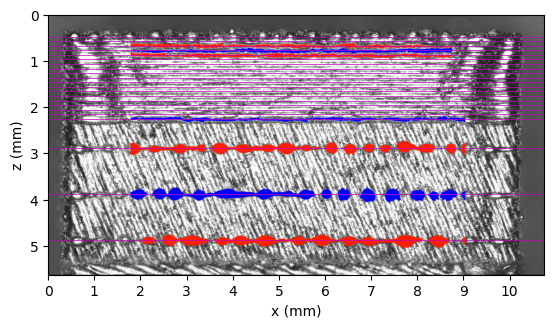

In [ ]:
#@title 2a Top view - load image and locate the centerline for each multi beads
scale = 0.541 #(px / um)
image = cv.imread('drive/My Drive/Research/Figures for balling/Top view/image (15) (1).png')# SAMPLE 11)
image_array = np.array(image)
#image = cv.imread('drive/My Drive/Research/Figures for balling/Top view/11s.png')#, cv.IMREAD_GRAYSCALE) # SAMPLE 11)
plt.imshow(image)#, cmap='gray')
starting_point = 1216
hatch_spacing_1 = 150
hatch_spacing_2 = 100
shrinkage = 0.99
points = np.arange(starting_point - hatch_spacing_2 * scale * shrinkage * 18,
                   starting_point + 1,
                   hatch_spacing_2 * scale * shrinkage)
points2 = np.arange(starting_point + 348,
                    starting_point + 348 + 2000 *shrinkage* scale + 1,
                    shrinkage*1000*scale)
plt.hlines(points[:],0,np.shape(image)[1]-1, color='m',linestyles='solid',linewidth=0.5)
plt.hlines(points2[:],0,np.shape(image)[1]-1, color='m',linestyles='solid',linewidth=0.5)

xarray = np.array([0,1,2,3,4,5,6,7,8,9,10])
yarray = np.array([0,1,2,3,4,5])
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
plt.xticks(xarray*scale*1e3,xarray)
plt.yticks(yarray*scale*1e3,yarray)
plt.show()

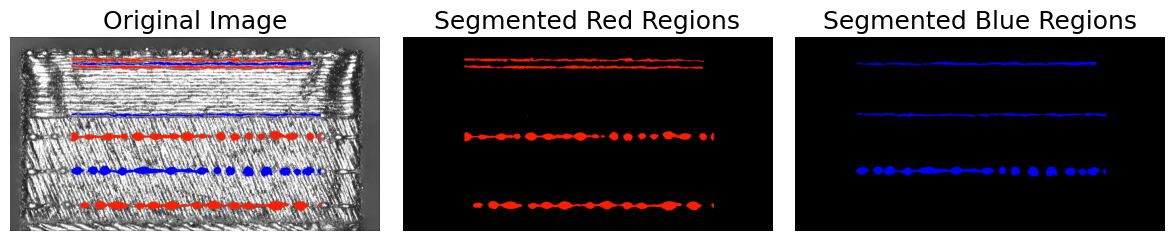

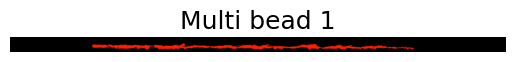

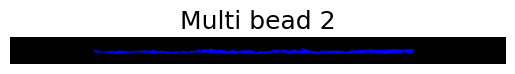

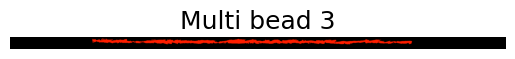

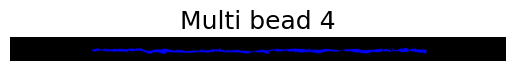

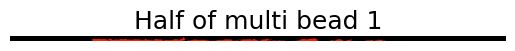

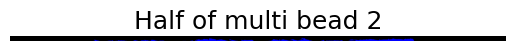

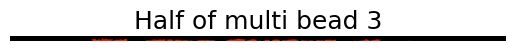

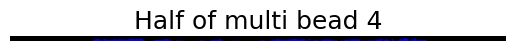

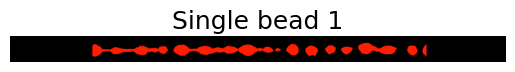

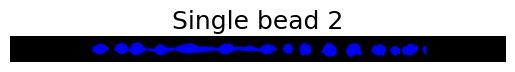

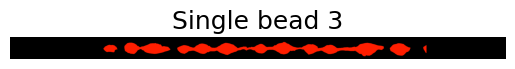

In [ ]:
#@title 2b Top view - digitally segment the red and blue regions

red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

red_mask = (red_channel >= 255) & (green_channel <= 30) & (blue_channel <= 0)
blue_mask = (red_channel <= 0) & (green_channel <= 0) & (blue_channel >= 255)

red_segmented_array = np.zeros_like(image_array)
red_segmented_array[:, :, 0] = red_mask * red_channel
red_segmented_array[:, :, 1] = red_mask * green_channel
red_segmented_array[:, :, 2] = red_mask * blue_channel
red_segmented_image = Image.fromarray(red_segmented_array)

blue_segmented_array = np.zeros_like(image_array)
blue_segmented_array[:, :, 0] = blue_mask * red_channel
blue_segmented_array[:, :, 1] = blue_mask * green_channel
blue_segmented_array[:, :, 2] = blue_mask * blue_channel
blue_segmented_image = Image.fromarray(blue_segmented_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image)#, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(red_segmented_image)
plt.title("Segmented Red Regions")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blue_segmented_image)
plt.title("Segmented Blue Regions")
plt.axis("off")

plt.tight_layout()
plt.show()

red_segment_1 = red_segmented_array[240:420]
blue_segment_1 = blue_segmented_array[240:560]
red_segment_2 = red_segmented_array[420:560]
blue_segment_2 = blue_segmented_array[1060:1340]

red_segment_1h = red_segmented_array[round(points[1]):round(points[2])]
blue_segment_1h = blue_segmented_array[round(points[2]):round(points[3])]
red_segment_2h = red_segmented_array[round(points[3]):round(points[4])]
blue_segment_2h = blue_segmented_array[round(points[17]):round(points[18])]

red_segment_3 = red_segmented_array[1400:1700]
blue_segment_3 = blue_segmented_array[1950:2250]
red_segment_4 = red_segmented_array[2500:2760]

plt.imshow(red_segment_1)
plt.title("Multi bead 1")
plt.axis("off")
plt.show()
plt.imshow(blue_segment_1)
plt.title("Multi bead 2")
plt.axis("off")
plt.show()
plt.imshow(red_segment_2)
plt.title("Multi bead 3")
plt.axis("off")
plt.show()
plt.imshow(blue_segment_2)
plt.title("Multi bead 4")
plt.axis("off")
plt.show()

plt.imshow(red_segment_1h)
plt.title("Half of multi bead 1")
plt.axis("off")
plt.show()
plt.imshow(blue_segment_1h)
plt.title("Half of multi bead 2")
plt.axis("off")
plt.show()
plt.imshow(red_segment_2h)
plt.title("Half of multi bead 3")
plt.axis("off")
plt.show()
plt.imshow(blue_segment_2h)
plt.title("Half of multi bead 4")
plt.axis("off")
plt.show()

plt.imshow(red_segment_3)
plt.title("Single bead 1")
plt.axis("off")
plt.show()
plt.imshow(blue_segment_3)
plt.title("Single bead 2")
plt.axis("off")
plt.show()
plt.imshow(red_segment_4)
plt.title("Single bead 3")
plt.axis("off")
plt.show()

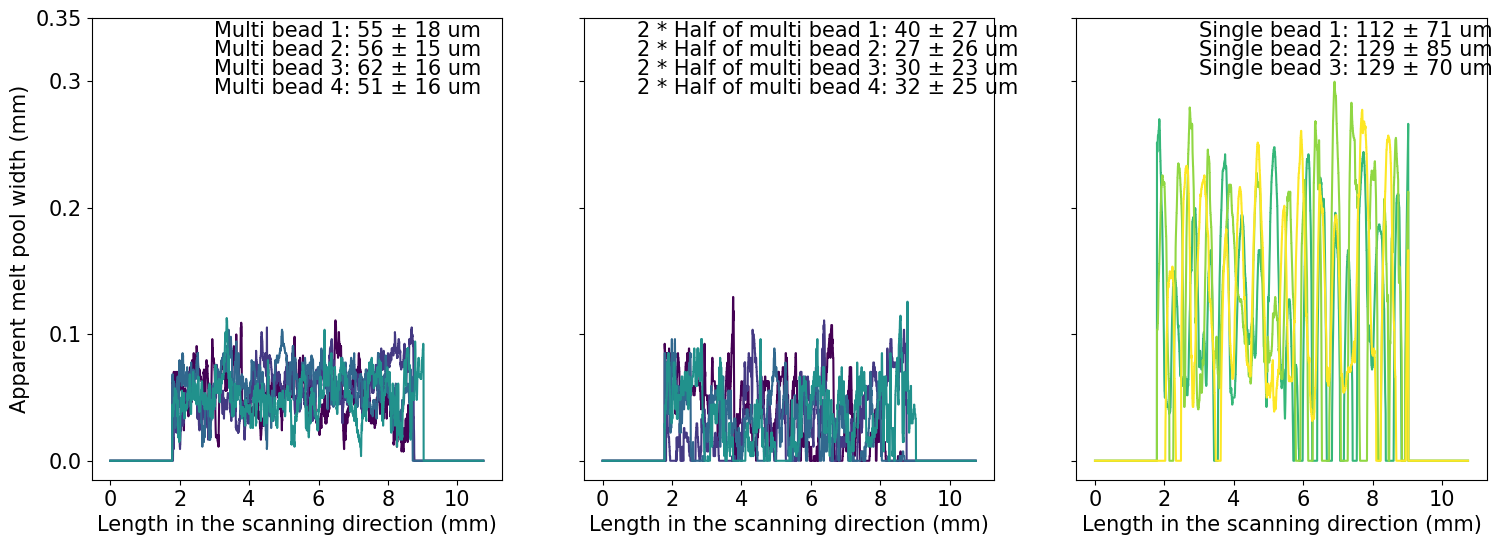

In [ ]:
#@title 2c Top view - measure the apparent width of melt pools

def meltpool_apparent_width(image, column_index):
    column = image[:, column_index, :]
    return np.sum((column != 0).any(axis=1))

def stack_widths(image):
  count = []
  for y in range(len(image[1])):
    count.append(meltpool_apparent_width(image, y))
  return count

def stack_widths_double(image):
  count = []
  for y in range(len(image[1])):
    count.append(meltpool_apparent_width(image, y)*2)
  return count

count1 = stack_widths(red_segment_1)
count2 = stack_widths(blue_segment_1)
count3 = stack_widths(red_segment_2)
count4 = stack_widths(blue_segment_2)

count1h = stack_widths_double(red_segment_1h)
count2h = stack_widths_double(blue_segment_1h)
count3h = stack_widths_double(red_segment_2h)
count4h = stack_widths_double(blue_segment_2h)

count5 = stack_widths(red_segment_3)
count6 = stack_widths(blue_segment_3)
count7 = stack_widths(red_segment_4)

def get_distinct_colors(cmap_name, num_colors):
  cmap = plt.get_cmap(cmap_name)
  colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
  return colors

distinct_colors = get_distinct_colors('viridis', 7)

fig, axes = plt.subplots(1,3,sharey=True,figsize = (18,6))
plt.rcParams.update({'font.size':15})

xarray = np.array([0,2,4,6,8,10])
yarray = np.array([0,0.1,0.2,0.3,0.35])

axes[0].plot(count1,c=distinct_colors[0])
axes[0].plot(count2,c=distinct_colors[1])
axes[0].plot(count3,c=distinct_colors[2])
axes[0].plot(count4,c=distinct_colors[3])
axes[0].set_xticks(xarray*scale*1e3,xarray)
axes[0].set_yticks(yarray*scale*1e3,yarray)
axes[0].set_xlabel('Length in the scanning direction (mm)')
axes[0].set_ylabel('Apparent melt pool width (mm)')
axes[0].text(3e3*scale,335*scale,'Multi bead 1: %i ± %i um'%(round(np.mean(count1[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count1[int(2e3*scale):int(8e3*scale)])/scale)))
axes[0].text(3e3*scale,320*scale,'Multi bead 2: %i ± %i um'%(round(np.mean(count2[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count2[int(2e3*scale):int(8e3*scale)])/scale)))
axes[0].text(3e3*scale,305*scale,'Multi bead 3: %i ± %i um'%(round(np.mean(count3[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count3[int(2e3*scale):int(8e3*scale)])/scale)))
axes[0].text(3e3*scale,290*scale,'Multi bead 4: %i ± %i um'%(round(np.mean(count4[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count4[int(2e3*scale):int(8e3*scale)])/scale)))

axes[1].plot(count1h,c=distinct_colors[0])
axes[1].plot(count2h,c=distinct_colors[1])
axes[1].plot(count3h,c=distinct_colors[2])
axes[1].plot(count4h,c=distinct_colors[3])
axes[1].set_xticks(xarray*scale*1e3,xarray)
axes[1].set_yticks(yarray*scale*1e3,yarray)
axes[1].set_xlabel('Length in the scanning direction (mm)')
axes[1].text(1e3*scale,335*scale,'2 * Half of multi bead 1: %i ± %i um'%(round(np.mean(count1h[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count1h[int(2e3*scale):int(8e3*scale)])/scale)))
axes[1].text(1e3*scale,320*scale,'2 * Half of multi bead 2: %i ± %i um'%(round(np.mean(count2h[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count2h[int(2e3*scale):int(8e3*scale)])/scale)))
axes[1].text(1e3*scale,305*scale,'2 * Half of multi bead 3: %i ± %i um'%(round(np.mean(count3h[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count3h[int(2e3*scale):int(8e3*scale)])/scale)))
axes[1].text(1e3*scale,290*scale,'2 * Half of multi bead 4: %i ± %i um'%(round(np.mean(count4h[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count4h[int(2e3*scale):int(8e3*scale)])/scale)))

axes[2].plot(count5,c=distinct_colors[4])
axes[2].plot(count6,c=distinct_colors[5])
axes[2].plot(count7,c=distinct_colors[6])
axes[2].set_xticks(xarray*scale*1e3,xarray)
axes[2].set_yticks(yarray*scale*1e3,yarray)
axes[2].set_xlabel('Length in the scanning direction (mm)')
axes[2].text(3e3*scale,335*scale,'Single bead 1: %i ± %i um'%(round(np.mean(count5[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count5[int(2e3*scale):int(8e3*scale)])/scale)))
axes[2].text(3e3*scale,320*scale,'Single bead 2: %i ± %i um'%(round(np.mean(count6[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count6[int(2e3*scale):int(8e3*scale)])/scale)))
axes[2].text(3e3*scale,305*scale,'Single bead 3: %i ± %i um'%(round(np.mean(count7[int(2e3*scale):int(8e3*scale)])/scale),round(np.std(count7[int(2e3*scale):int(8e3*scale)])/scale)))

plt.show()

<ipython-input-54-0398e6ed85dd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Bead', y='Count', data=df, palette="viridis", cut=0) #cut = 0 prevents extending the violin past the data range


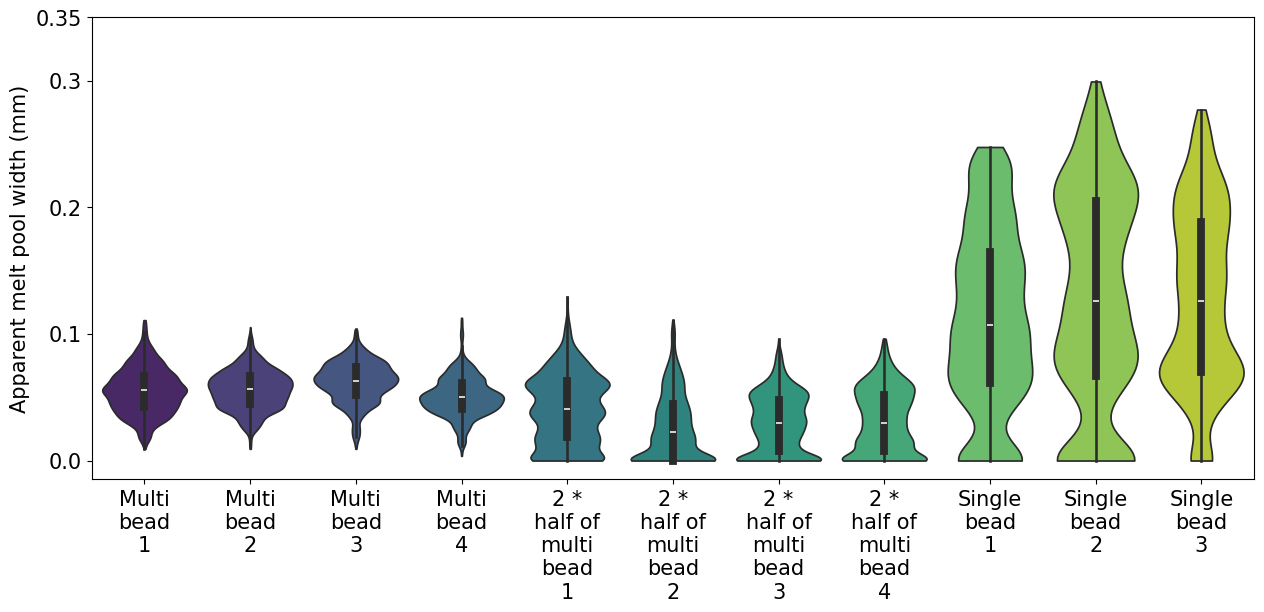

In [ ]:
#@title 2d Top view - plotting the apparent width of the melt pools using violin plots
data = {
    'Count': np.concatenate([count1[int(2e3*scale):int(8e3*scale)], count2[int(2e3*scale):int(8e3*scale)], count3[int(2e3*scale):int(8e3*scale)], count4[int(2e3*scale):int(8e3*scale)], count1h[int(2e3*scale):int(8e3*scale)], count2h[int(2e3*scale):int(8e3*scale)], count3h[int(2e3*scale):int(8e3*scale)], count4h[int(2e3*scale):int(8e3*scale)], count5[int(2e3*scale):int(8e3*scale)], count6[int(2e3*scale):int(8e3*scale)], count7[int(2e3*scale):int(8e3*scale)]]),
    'Bead': np.concatenate([
        np.repeat('Multi\nbead\n1', len(count1[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Multi\nbead\n2', len(count2[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Multi\nbead\n3', len(count3[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Multi\nbead\n4', len(count4[int(2e3*scale):int(8e3*scale)])),
        np.repeat('2 *\nhalf of\nmulti\nbead\n1', len(count1h[int(2e3*scale):int(8e3*scale)])),
        np.repeat('2 *\nhalf of\nmulti\nbead\n2', len(count2h[int(2e3*scale):int(8e3*scale)])),
        np.repeat('2 *\nhalf of\nmulti\nbead\n3', len(count3h[int(2e3*scale):int(8e3*scale)])),
        np.repeat('2 *\nhalf of\nmulti\nbead\n4', len(count4[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Single\nbead\n1', len(count5[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Single\nbead\n2', len(count6[int(2e3*scale):int(8e3*scale)])),
        np.repeat('Single\nbead\n3', len(count7[int(2e3*scale):int(8e3*scale)]))])}
df = pd.DataFrame(data)

plt.figure(figsize=(15, 6))
sns.violinplot(x='Bead', y='Count', data=df, palette="viridis", cut=0) #cut = 0 prevents extending the violin past the data range
plt.xlabel('')
plt.ylabel('Apparent melt pool width (mm)')

yarray = np.array([0,0.1,0.2,0.3,0.35])

plt.yticks(yarray*scale*1e3,yarray)
plt.show()

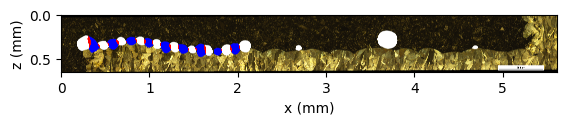

In [ ]:
#@title 3a Cross sectional view - load image
scale = 7.3058 #px/um

img = cv.imread('drive/My Drive/Research/Figures for balling/Cross section/Sample9b_tagged.tif')
plt.imshow(img)
xarray = np.array([0,1,2,3,4,5])
yarray = np.array([0,0.5])
plt.xticks(xarray * scale * 1e3, xarray)
plt.yticks(yarray * scale * 1e3, yarray)
plt.ylabel('z (mm)')
plt.xlabel('x (mm)')
plt.show()

Number of bounding boxes: 22


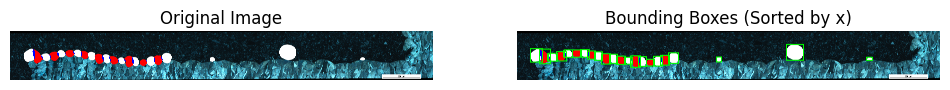

In [ ]:
#@title 3b Cross sectional view - draw bounding box
def get_bounding_boxes(img, color_lower, color_upper, min_cluster_size):
    color_mask = cv.inRange(img, color_lower, color_upper)
    contours, _ = cv.findContours(color_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    boundaries = []
    for contour in contours:
        if cv.contourArea(contour) > min_cluster_size:
            x, y, w, h = cv.boundingRect(contour)
            boundaries.append([x, x+w, y, y+h])
    return boundaries


img_blue_to_red = img.copy()
blue_pixels = np.all(img_blue_to_red == [255, 0, 0], axis=-1)
img_blue_to_red[blue_pixels] = [0, 0, 255]

img_blue_to_white = img.copy()
blue_pixels = np.all(img_blue_to_white == [255, 0, 0], axis=-1)
img_blue_to_white[blue_pixels] = [255, 255, 255]

boundaries = get_bounding_boxes(img_blue_to_red, np.array([0, 0, 255]), np.array([0, 0, 255]), 500) + get_bounding_boxes(img_blue_to_white, np.array([255, 255, 255]), np.array([255, 255, 255]), 500)
boundaries.sort(key=lambda x: x[0])
boundaries = boundaries[:22]
output_image = img.copy()
for x,x2,y,y2 in boundaries:
    cv.rectangle(output_image, (x, y), (x2, y2), (0, 255, 0), 100)
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
output_image_rgb = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
print(f'Number of bounding boxes: {len(boundaries)}')
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Bounding Boxes (Sorted by x)")
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()

In [ ]:
np.array(boundaries)[:,1]-np.array(boundaries)[:,0]

array([1132, 1052,  956,  989,  855,  917,  870,  740,  778,  914,  817,
        919,  774,  956,  741,  705,  859,  854, 1006,  516, 1658,  530,
       3752])

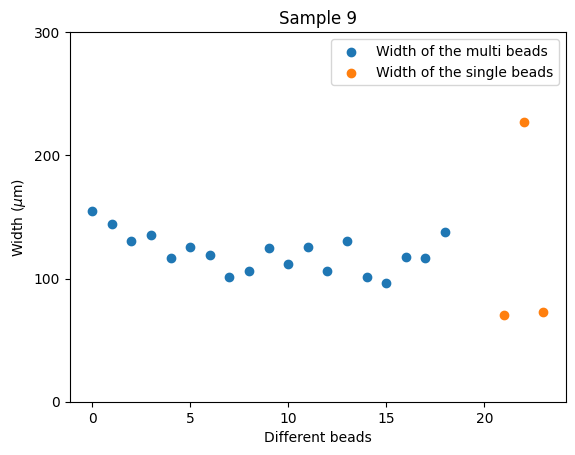

In [ ]:
#@title 3c Cross sectional view - plot the results

beads = pd.DataFrame([np.array(boundaries)[:,0],
                      np.array(boundaries)[:,1]-np.array(boundaries)[:,0],
                      np.array(boundaries)[:,1]
                     ],index=['left','l-r','right']).T
plt.scatter(np.arange(19),beads['l-r'][:19],label='Width of the multi beads')
plt.scatter([21,22,23],beads['l-r'][19:23],label='Width of the single beads')

yarray = np.array([0,100,200,300])
plt.yticks(yarray * scale, yarray)
plt.title('Sample 9')
plt.ylabel('Width ($\mu$m)')
plt.xlabel('Different beads')

plt.legend()

# Scrap

In [ ]:
"""data = pd.read_csv('drive/My Drive/Research/Figures for balling/Top view/VR-20240322_133318_Height.csv', on_bad_lines='skip') # sample 9
plt.imshow(data)
plt.show()
print(np.unique(data))
print(np.shape(data))

image = cv.imread('drive/My Drive/Research/Figures for balling/Top view/Sample9h.tif')#cv.IMREAD_GRAYSCALE) # SAMPLE 9)
image_array = np.array(image)
print(np.shape(image_array))
plt.imshow(image_array)#, cmap='gray')
plt.show()
plt.imshow(data.iloc[500:1000,1000:2000])
plt.show()
len(np.unique(data.iloc[500:1000,1000:2000]))"""

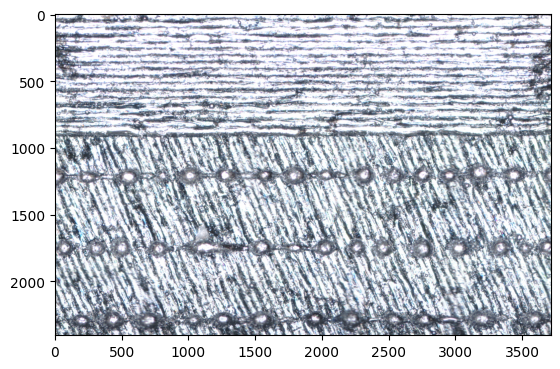

In [ ]:
im1=cv.imread('drive/My Drive/Research/Figures for balling/11.png')[285:2689,966:4683]
plt.imshow(im1)
plt.show()

In [ ]:
im1.shape

(2404, 3717, 3)

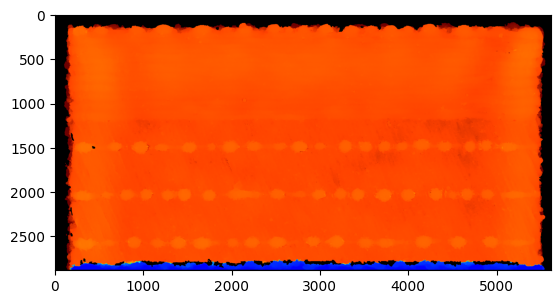

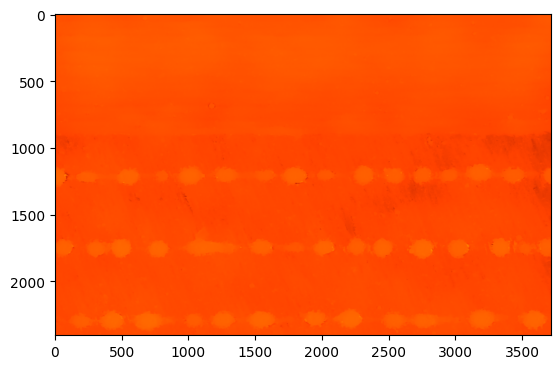

(2404, 3717, 3)

In [ ]:
im2=cv.imread('drive/My Drive/Research/Figures for balling/S11__.tif')
plt.imshow(im2)
plt.show()
plt.imshow(im2[285:2689,966:4683])
plt.show()
(im2[285:2689,966:4683].shape)

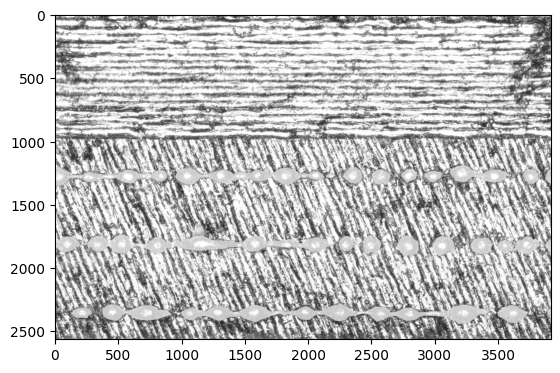

(2562, 3918, 3)

In [ ]:
im3=cv.imread('drive/My Drive/Research/Figures for balling/beads_with_background.png')
plt.imshow(im3)
plt.show()
im3.shape

In [ ]:
2887, 5615

In [ ]:
2887 - 285 -198

2404

Placed cropped image at top-left corner: (850, 150)
Cropped image bottom-right corner: (4768, 2712)


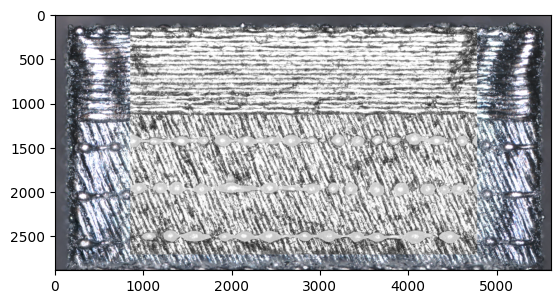

In [ ]:
import cv2
import numpy as np

def replace_part_with_crop(original_image_path, cropped_image_path, output_image_path, position):
    # Load the original and cropped images
    original_image = cv2.imread(original_image_path)
    cropped_image = cv2.imread(cropped_image_path)

    if original_image is None or cropped_image is None:
        raise ValueError("Could not load one or both of the images.")

    # Get the dimensions of the cropped image
    height, width, _ = cropped_image.shape

    # Determine the position to place the cropped image
    top_left = position
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Ensure the cropped image fits within the bounds of the original image
    if (bottom_right[0] > original_image.shape[1]) or (bottom_right[1] > original_image.shape[0]):
        raise ValueError("The cropped image does not fit within the bounds of the original image at the specified position.")

    # Replace the part of the original image with the cropped image
    original_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = cropped_image

    # Save the modified image
    plt.imshow(original_image)

    return top_left, bottom_right

# Example usage
original_image_path = 'drive/My Drive/Research/Figures for balling/11.png'  # Path to the original image
cropped_image_path = 'drive/My Drive/Research/Figures for balling/beads_with_background.png'   # Path to the cropped image
output_image_path = "output.jpg"      # Path to save the modified image
position = (850, 150)                    # Top-left corner where the cropped image will be placed

try:
    top_left, bottom_right = replace_part_with_crop(original_image_path, cropped_image_path, output_image_path, position)
    print(f"Placed cropped image at top-left corner: {top_left}")
    print(f"Cropped image bottom-right corner: {bottom_right}")
except ValueError as e:
    print(f"Error: {e}")

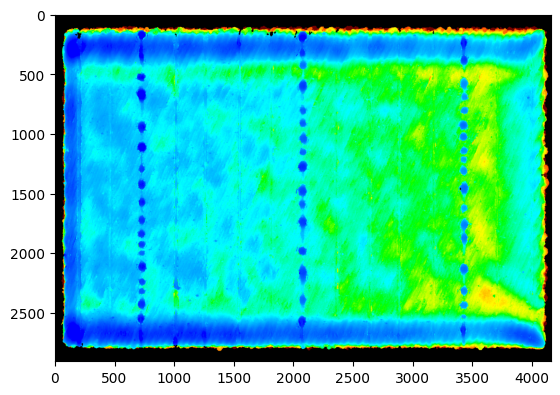

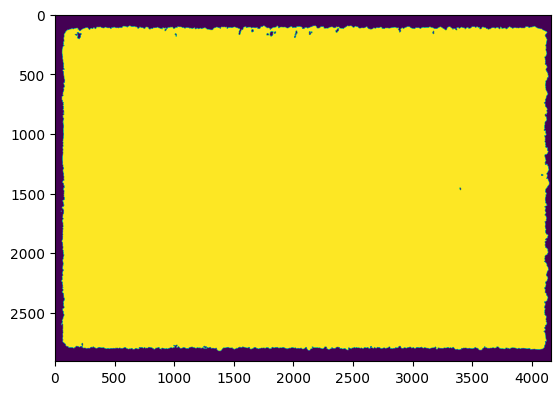

In [ ]:
im1=cv.imread('drive/My Drive/Research/Figures for balling/S11_.tif')
plt.imshow(im1)
plt.show()
im1=cv.cvtColor(im1,cv.COLOR_BGR2GRAY)
im1=cv.threshold(im1,1,111,cv.THRESH_BINARY)[1]
plt.imshow(im1)
plt.show()

#MS&T 24 prep

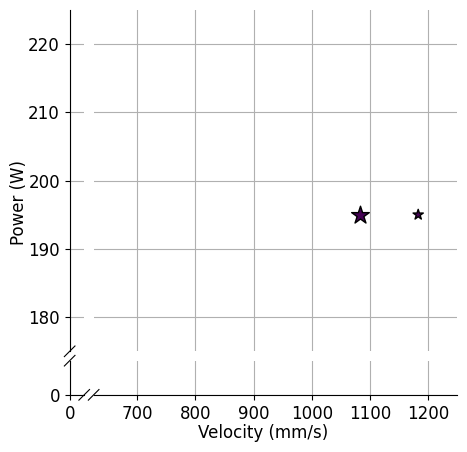

In [ ]:
import matplotlib.pyplot as plt
import brokenaxes
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':12})
p = [220,220,220,220,220,195,195,216,216,216,216]
v = [1100,1000,900,800,700,1183,1083,1110,1010,910,810]
pr = [1,1,1,1,1,0,0,0.5,0.5,0.5,0.5]
c = plt.cm.viridis
n = plt.Normalize(vmin=0, vmax=1)
bax = brokenaxes.brokenaxes(xlims=((0, 25), (625, 1250)), ylims=((0,5), (175, 225)), hspace=0.05, wspace=0.05)
#bax.scatter(v[:5], p[:5], c=pr[:5], cmap=c,edgecolor = 'k', s=56, norm=n, marker='s',label='(150 μm, 30 μm)')
#bax.scatter(v[ 4], p[4], c=pr[4], cmap=c,edgecolor = 'k', s=168, norm=n, marker='s')

bax.scatter(v[5:7], p[5:7], c=pr[5:7], cmap=c, s=60, edgecolor = 'k',norm=n, marker='*',label='(  90 μm, 30 μm)')
bax.scatter(v[6], p[6], c=pr[6], cmap=c, s=179, edgecolor = 'k',norm=n, marker='*')

#bax.scatter(v[7:], p[7:], c=pr[7:], cmap=c, s=64, edgecolor='k',norm=n,label='(100 μm, 60 μm)')
#bax.scatter(v[10], p[10], c=pr[10], cmap=c, s=193,edgecolor = 'k', norm=n)

bax.set_xlabel('Velocity (mm/s)',labelpad=21)
bax.set_ylabel('Power (W)')
#bax.legend(loc='lower left',title='(H,L) =')

bax.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
GLOBAL_PATH='drive/My Drive/Research/2 SETO HiTEMMP/Small 3D scan/'

In [ ]:
data=pd.read_csv(GLOBAL_PATH+'H 282 single beads on fins/ResultsMelt2.csv')

bea=[7,8,0, 5,6,3,2,0,0, 4,2,2,0,0,0, 0,0,0,0,0,0, 4,0,1,0,0,0]
data['Beads']=2
data['Beadup?']=2

for y in range(len(data)):
  data['Beads'][y]=bea[y]
  if data['Beads'][y]!=0:
    data['Beadup?'][y]=data['Beads'][y]/data['Beads'][y]
  else:
    data['Beadup?'][y]=0

data

In [ ]:
fig=plt.scatter(data['P'],data['V'],c=data['Beadup?'])

In [ ]:
fig,ax=plt.scatter(data['P'],data['V'],c=data['Beads'])
fig.colorbar()
#,cmap=matplotlib.colors.cool

In [ ]:
X=data.iloc[:,:8].drop(columns=[' ','S','Label','Absorptivity','Area','Unnamed: 7'])
y=data.iloc[:,9]
X,y

In [ ]:
RFR=RandomForestRegressor(min_samples_leaf=2)
RFR.fit(X,y)

#TMS 24 prep

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.interpolate import griddata
import cv2

In [ ]:
cd drive/MyDrive/Research/5 APS

/content/drive/MyDrive/Research/5 APS


In [ ]:
ls

 069_Camera_17_39_26_087.tiff   john_features.csv      paper/
 Complete_data_clean.xlsx       john_predicted_mask/  'paper - 2'/
'DXR stage'/                    output.tif             ProcessedJohnData/


In [ ]:
data = pd.read_excel('Complete_data_clean.xlsx').drop(["Width",'spot_size','sample thickness','sample id'], axis = 1)
data.rename(columns=
 {"Depth": "Keyhole Depth",
  "bead_Angle": "Bead Angle",
  "bead_Angle": "Bead Angle",
  "Bead_Width": "Bead Width",
  "Bead_Height": "Bead Height",
  "Length": "Keyhole Length",
  "FW_angle": "Front Wall Angle",
  "Radius": "Bead Radius"
  },inplace=True)
data['Linear Energy Density'] = data['Power']/data['Velocity']
data = data.iloc[:,[1,0,9,2,4,3,5,6,7,8]]
data

Power  Velocity        std  Keyhole Depth  Keyhole Length  \
0     370      1772   0.000000      90.352941      544.000000   
1     550      2180   0.000000     116.689655      771.103448   
2     550      1772   0.000000     144.000000      789.069767   
3     450      1366   0.000000     163.235294      577.352941   
4     750      2180   0.000000     158.300000      876.900000   
5     650      2587   0.000000     123.771429      869.485714   
6     850      4000   4.978428     103.000000      590.111111   
7     400      3000   2.967064      47.727273      263.045455   
8     450      3401  21.479611      48.700000      256.600000   
9     300      2000  18.193767      55.200000      341.066667   
10    520      4000  27.827107      43.625000      312.500000   
11    200       500   7.037584     163.235294       81.058824   
12    300       500   2.775380     261.411765       93.470588   
13    400       500   2.790962     354.000000      121.470588   
14    520       500   2.817435     534.000000      126.705882   
15    630       500   1.251161     649.529412      116.823529   
16    740       500   2.744458     667.294118      118.411765   
17    740      1000   5.739076     383.459016      612.540984   
18    740      1500   4.083699     238.384615      891.230769   
19    850      1500   3.187714     267.000000      942.200000   
20    630      2000   4.147121     142.950000      823.950000   
21    850      3000   4.222834     125.062500      800.437500   
22    630      3000   6.882607      82.758621      505.862069   
23    740      4000   5.419998      66.250000      501.500000   
24    630      4000   4.087299      59.086957      360.000000   
25    520      2587   1.706983      69.545455      434.818182   
26    850       750   0.263339     603.411765      227.470588   
27    740       750   3.433624     438.060000      209.880000   
28    630       750   2.076265     418.380000      208.920000   
29    520       750   2.003432     337.200000      178.260000   
30    850      1250   2.603796     262.294118      772.294118   
31    630      1250   3.824919     209.117647      481.470588   
32    850      1750   4.921870     241.269231      946.153846   
33    740      1750   3.969522     189.176471      970.941176   
34    850      2250   1.745344     154.875000      886.500000   
35    740      2587   3.039483     117.000000      803.823529   
36    200      1500   5.321890      31.058824      158.000000   
37    300      2500   2.864085      31.647059      107.470588   
38    200      2250   2.314813       1.941176        2.058824   
39    450      2250   3.734733      69.292683      416.268293   
40    630      3401   2.588500      68.280000      479.640000   

    Front Wall Angle  Bead Radius  Bead Width  Bead Height  Bead Angle  
0          64.050777    30.970148     72.6338      54.3490     92.8494  
1          67.071421    34.844339     66.2144      49.8950     99.6732  
2          70.045167    41.212525     71.0512      48.2638    101.6702  
3          72.974351    43.285706     78.3058      23.2404     58.3272  
4          69.764187    53.898076     76.7084      22.7900     63.8042  
5          67.329713    33.243036     75.4786      35.8432     63.5348  
6          59.362788    21.912660     29.1874      21.3014    104.1732  
7          38.205435    34.833806     42.8140      31.8844     98.4136  
8          40.662958    37.996817     53.1744      31.6146     78.5214  
9          54.691958    36.686569     64.4938      37.8002     64.4996  
10         32.356122    53.303901     59.4316      14.4482     47.8586  
11         74.223057   161.303928    171.5692      27.7796     26.2822  
12         79.275555   150.834401    182.2962      44.4552     41.1540  
13         80.294044   137.199710    197.8464      60.3554     57.8952  
14         83.033188   157.278821    193.4890      17.7454     22.8474  
15         84.442700   178.319025    180.1240      17.7428     24.2242  
16         84.888246   184.90523

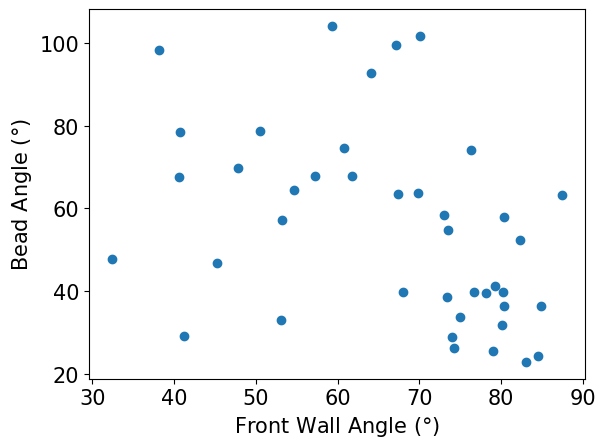

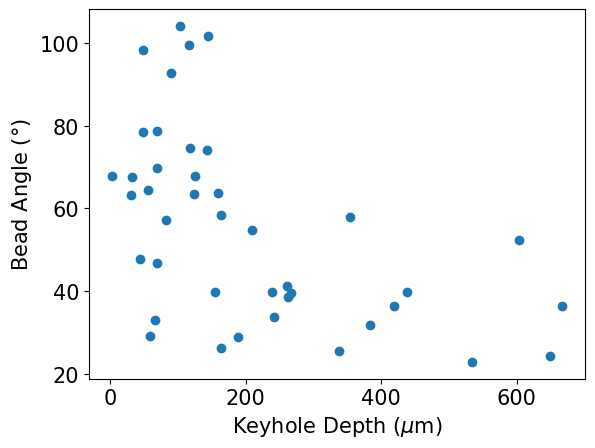

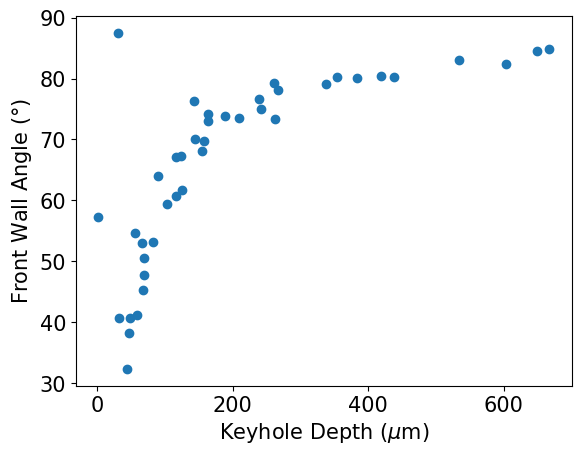

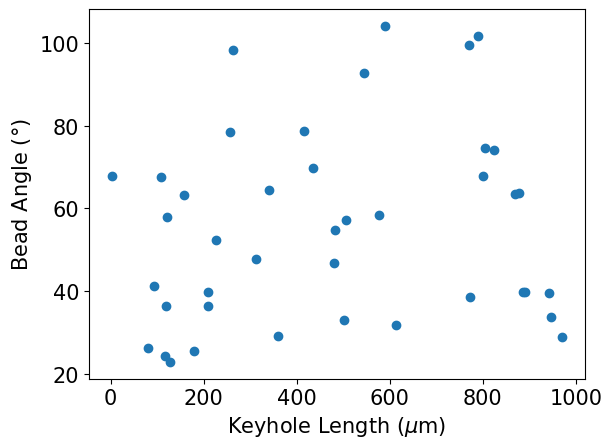

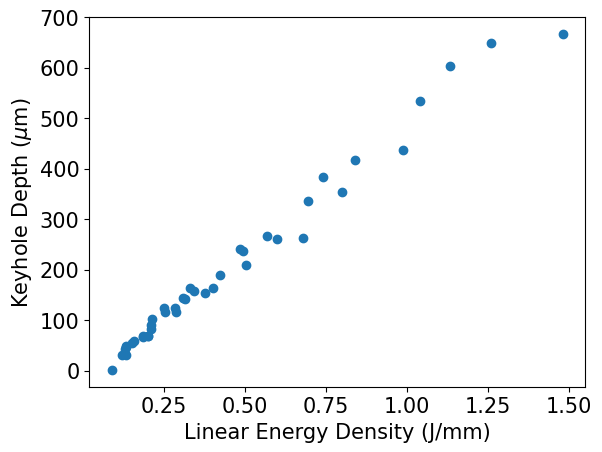

In [ ]:
plt.scatter(data['Front Wall Angle'],data['Bead Angle'])
plt.xlabel('Front Wall Angle ($\degree$)')
plt.ylabel('Bead Angle ($\degree$)')
plt.show()
plt.scatter(data['Keyhole Depth'],data['Bead Angle'])
plt.ylabel('Bead Angle ($\degree$)')
plt.xlabel('Keyhole Depth ($\mu$m)')
plt.show()
plt.scatter(data['Keyhole Depth'],data['Front Wall Angle'])
plt.ylabel('Front Wall Angle ($\degree$)')
plt.xlabel('Keyhole Depth ($\mu$m)')
plt.show()

plt.scatter(data['Keyhole Length'],data['Bead Angle'])
plt.ylabel('Bead Angle ($\degree$)')
plt.xlabel('Keyhole Length ($\mu$m)')
plt.show()


plt.scatter(data['Linear Energy Density'],data['Keyhole Depth'],)
plt.xlabel('Linear Energy Density (J/mm)')
plt.ylabel('Keyhole Depth ($\mu$m)')
plt.show()

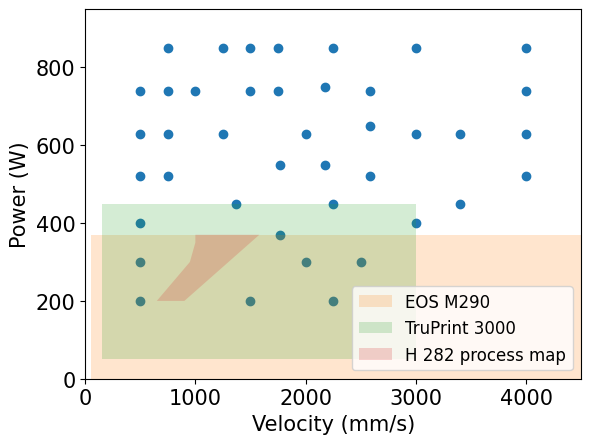

In [ ]:
plt.scatter(data['Velocity'],data['Power'])
plt.rcParams.update({'font.size':15})

plt.fill_between((5e1,7e3),(37e1,37e1),alpha=0.2, label='EOS M290')
plt.fill_between((15e1,3e3),(45e1,45e1),(5e1,5e1),alpha= .2, label = 'TruPrint 3000')
plt.fill_betweenx((2e2,25e1,3e2,35e1,37e1),(650,8e2,950,1e3,1e3),(9e2,11e2,13e2,15e2,1580),alpha=0.2, label='H 282 process map')
plt.xlim(0,45e2)
plt.ylim(0,950)
plt.ylabel('Power (W)')


plt.xlabel('Velocity (mm/s)')
plt.legend(loc='lower right',fontsize=12)

Figure 2

'\nfor y in paths:\n  pic = cv2.imread("paper/"+y, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)\n  pic=pic[163:413,88:488]\n  pic = (pic * 255).astype(np.uint8)\n  cv2.imwrite("paper/"+y, pic)\n'

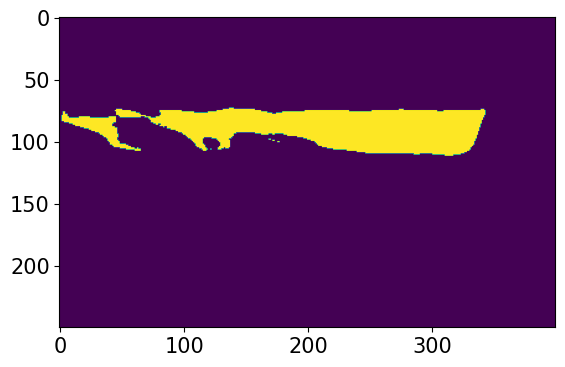

In [ ]:
paths = ['068_Camera_17_35_47_085.tif','069_Camera_17_39_26_090.tif','070_Camera_17_42_35_078.tif','071_Camera_17_46_16_112.tif','072_Camera_17_48_39_075.tif','073_Camera_17_52_53_128.tif','077_Camera_18_59_21_102.tif',
         '078_Camera_19_06_27_128.tif','079_Camera_19_10_00_108.tif','080_Camera_19_12_59_084.tif','133_Camera_12_12_26_109.tif','134_Camera_12_18_01_094.tif','135_Camera_12_24_15_069.tif','136_Camera_12_31_42_060.tif',
         '137_Camera_12_35_22_101.tif','138_Camera_12_38_45_049.tif','143_Camera_15_58_43_090.tif','144_Camera_16_01_52_080.tif','145_Camera_16_05_00_090.tif','147_Camera_17_00_03_070.tif','148_Camera_17_03_45_070.tif',
         '149_Camera_17_05_08_085.tif','151_Camera_17_18_27_080.tif','152_Camera_17_21_09_110.tif','153_Camera_17_38_05_128.tif','154_Camera_17_41_27_120.tif','155_Camera_17_43_40_128.tif','157_Camera_17_50_59_092.tif',
         '159_Camera_17_57_01_054.tif','160_Camera_18_39_16_060.tif','161_Camera_18_41_52_059.tif','162_Camera_18_45_33_029.tif','163_Camera_18_48_30_029.tif','164_Camera_18_50_54_012.tif','165_Camera_18_54_10_052.tif',
         '166_Camera_18_57_53_075.tif','167_Camera_19_17_31_060.tif','168_Camera_19_21_09_050.tif','169_Camera_19_23_31_050.tif','170_Camera_19_26_33_050.tif','171_Camera_19_31_06_090.tif','172_Camera_19_34_34_111.tif',
         '173_Camera_19_37_00_090.tif','175_Camera_00_12_01_070.tif','176_Camera_00_14_43_116.tif','177_Camera_00_18_45_090.tif','178_Camera_00_20_53_076.tif','179_Camera_00_22_55_090.tif','180_Camera_00_25_57_085.tif',
         '181_Camera_00_37_13_050.tif','182_Camera_00_39_19_070.tif','183_Camera_00_41_20_063.tif','184_Camera_00_43_17_085.tif','185_Camera_00_45_02_090.tif','186_Camera_00_47_01_058.tif','187_Camera_00_48_38_060.tif']
pic = cv2.imread("paper/"+paths[9], cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow(pic)
np.unique(pic)
"""
for y in paths:
  pic = cv2.imread("paper/"+y, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
  pic=pic[163:413,88:488]
  pic = (pic * 255).astype(np.uint8)
  cv2.imwrite("paper/"+y, pic)
"""

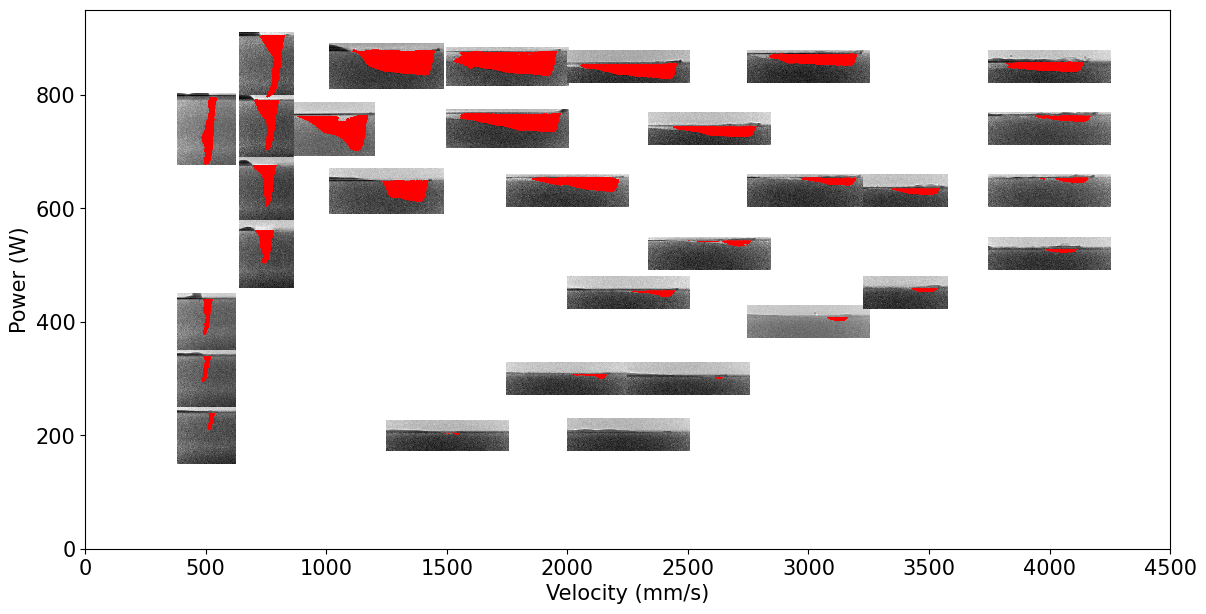

In [ ]:
data2 = pd.read_excel('Complete_data_clean.xlsx',sheet_name=1).drop('Thickness',axis=1)
paths = [#'069_Camera_17_39_26_090.tif','070_Camera_17_42_35_078.tif','071_Camera_17_46_16_112.tif','073_Camera_17_52_53_128.tif','079_Camera_19_10_00_108.tif','080_Camera_19_12_59_084.tif',
         '133_Camera_12_12_26_109.tif',
         '135_Camera_12_24_15_069.tif','136_Camera_12_31_42_060.tif','137_Camera_12_35_22_101.tif','138_Camera_12_38_45_049.tif','143_Camera_15_58_43_090.tif','144_Camera_16_01_52_080.tif','145_Camera_16_05_00_090.tif',
         '148_Camera_17_03_45_070.tif','149_Camera_17_05_08_085.tif','154_Camera_17_41_27_120.tif','157_Camera_17_50_59_092.tif','159_Camera_17_57_01_054.tif','161_Camera_18_41_52_059.tif','162_Camera_18_45_33_029.tif',
         '163_Camera_18_48_30_029.tif','164_Camera_18_50_54_012.tif','165_Camera_18_54_10_052.tif','166_Camera_18_57_53_075.tif','167_Camera_19_17_31_060.tif','168_Camera_19_21_09_050.tif','169_Camera_19_23_31_050.tif',
         '170_Camera_19_26_33_050.tif','171_Camera_19_31_06_090.tif','173_Camera_19_37_00_090.tif','175_Camera_00_12_01_070.tif','176_Camera_00_14_43_116.tif','177_Camera_00_18_45_090.tif','178_Camera_00_20_53_076.tif',
         '179_Camera_00_22_55_090.tif','182_Camera_00_39_19_070.tif','184_Camera_00_43_17_085.tif','185_Camera_00_45_02_090.tif','187_Camera_00_48_38_060.tif']
fig, p2 =  plt.subplots(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.xlim(0,45e2)
plt.ylim(0,950)
plt.ylabel('Power (W)')
plt.xlabel('Velocity (mm/s)')
def drw(path,a,b,c= 0,d=250,e=0,f=400,z=0.22,brightness_increase = 0):
  p2.add_artist(AnnotationBbox(OffsetImage(np.clip(plt.imread(path)[c:d,e:f]  + brightness_increase, 0, 255),zoom = z,cmap='gray'),
    (a, b  ), frameon = False))
for y in range(len(paths)):
  p = "paper/"+paths[y]+"f"
  q = data2[data2['Sample']==int((p)[6:9])]
  if int(q['V']) < 650:
        if int(q['P'])<5e2:
              drw(p,q['V'],q['P'],c=65,f=190)
        if int(q['P'])>7e2:
              drw(p,q['V'],q['P'],c=15,f=190)
  elif int(q['V']) < 950:
    drw(p,q['V'],q['P'],c=28,e=32,f=210,brightness_increase=5e1)
  elif int(q['V']) < 1250:
    drw(p,q['V'],q['P'],d=175,f=320)
  elif int(q['V']) < 1450:
    drw(p,q['V'],q['P'],c=50,d=200,f=375)
  elif int(q['V']) < 1650:
        if int(q['P']) <3e2:
              drw(p,q['V'],q['P'],c=50,d=150)
  elif int(q['V']) < 1950:
    drw(p,q['V'],q['P'],c=75,d=200)
  elif int(q['V']) < 3250:
    drw(p,q['V'],q['P'],c=45,d=150)
  elif int(q['V']) < 3750:
    drw(p,q['V'],q['P'],c=45,d=150,e=75,f=350)
  else:
    drw(p,q['V'],q['P'],c=45,d=150)
def drw(path,a,b,c= 0,d=250,e=0,f=400,z=0.22,brightness_increase = 0):
  scaled_image = np.clip(plt.imread(path)[c:d,e:f]  + brightness_increase, 0, 255)
  rgba_image = np.zeros((scaled_image.shape[0], scaled_image.shape[1], 4), dtype=np.uint8)

  # Set red channel to 255 and alpha channel to 0 where the binary image is 255
  rgba_image[:, :, 0] = 255  # Red channel
  rgba_image[:, :, 3] = scaled_image  # Alpha channel

  p2.add_artist(AnnotationBbox(OffsetImage(
      rgba_image,
      zoom = z,cmap='Reds'),
    (a, b  ), frameon = False))
for y in range(len(paths)):
  p = "paper/"+paths[y]
  q = data2[data2['Sample']==int((p)[6:9])]
  if int(q['V']) < 650:
        if int(q['P'])<5e2:
              drw(p,q['V'],q['P'],c=65,f=190)
        if int(q['P'])>7e2:
              drw(p,q['V'],q['P'],c=15,f=190)
  elif int(q['V']) < 950:
    drw(p,q['V'],q['P'],c=28,e=32,f=210)
  elif int(q['V']) < 1250:
    drw(p,q['V'],q['P'],d=175,f=320)
  elif int(q['V']) < 1450:
    drw(p,q['V'],q['P'],c=50,d=200,f=375)
  elif int(q['V']) < 1650:
        if int(q['P']) <3e2:
              drw(p,q['V'],q['P'],c=50,d=150)
  elif int(q['V']) < 1950:
    drw(p,q['V'],q['P'],c=75,d=200)
  elif int(q['V']) < 3250:
    drw(p,q['V'],q['P'],c=45,d=150)
  elif int(q['V']) < 3750:
    drw(p,q['V'],q['P'],c=45,d=150,e=75,f=350)
  else:
    drw(p,q['V'],q['P'],c=45,d=150)
plt.show()

In [ ]:
data3 = pd.read_csv('john_features.csv')
data3['ID'] = 2
for y in range(len(data3)):
  data3['ID'][y] = int(data3['img_name'][y][:3])
mean = []
std = []
for y in data3['ID'].unique():
  mean.append(np.mean(data3[data3["ID"]==y]))
  std.append(np.std(data3[data3["ID"]==y]))
mean = pd.DataFrame(mean)
std = pd.DataFrame(std)
std = std.drop(columns= ['ID'])
std.columns = ['depth_std', 'width_top_std', 'width_quarter_std', 'width_half_std', 'width_3quarter_std', 'avg_width_std', 'widest_width_std', 'num_white_pixel_std', 'perimeter_std', 'tan_theta_std']
mean.columns = ['depth_mean', 'width_top_mean', 'width_quarter_mean', 'width_half_mean', 'width_3quarter_mean', 'avg_width_mean', 'widest_width_mean', 'num_white_pixel_mean', 'perimeter_mean', 'tan_theta_mean', 'ID']

<ipython-input-58-df8aa3d47354>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['ID'][y] = int(data3['img_name'][y][:3])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axi

In [ ]:
data4 = pd.concat((mean,std), axis=1)

data4['P'] = 2
data4['V'] = 2
for y in range(len(data4)):
  data4['P'][y] = data2[data2['Sample']==data4['ID'][y]]['P']
  data4['V'][y] = data2[data2['Sample']==data4['ID'][y]]['V']
data4 = data4.iloc[:,[10,21,22,0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]]

<ipython-input-59-5e8ab9328ae1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['P'][y] = data2[data2['Sample']==data4['ID'][y]]['P']
<ipython-input-59-5e8ab9328ae1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['V'][y] = data2[data2['Sample']==data4['ID'][y]]['V']


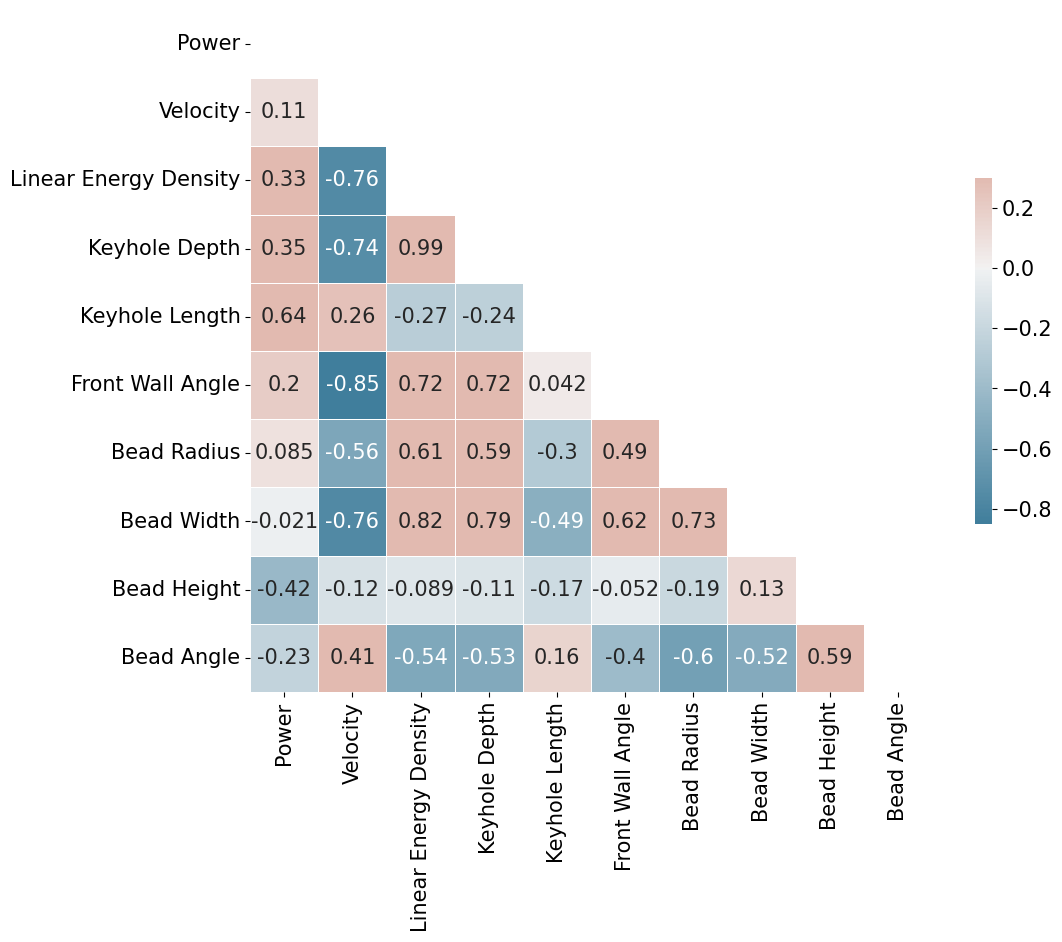

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# plt.title('Correlation Matrix of Laser Parameters')
plt.show()

R^2 Score: 0.6354498839633467
Train RMSE: 13.837443130646431


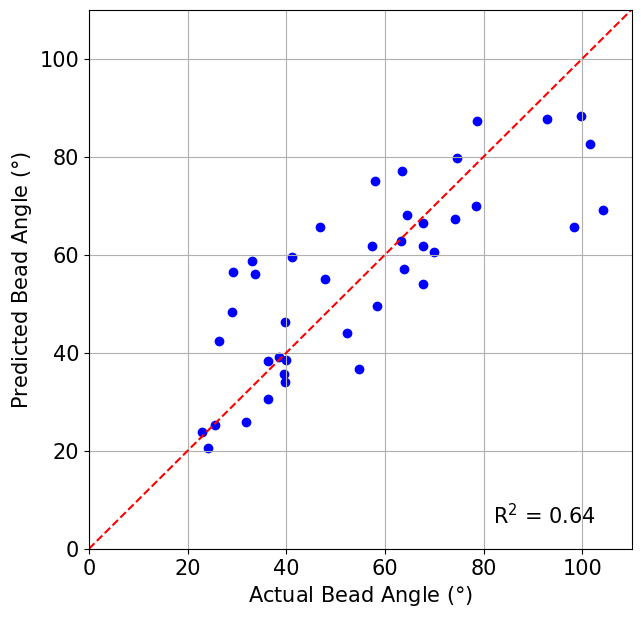

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

# Compute R^2 score for the entire dataset


X = data.drop(columns=['Linear Energy Density','Bead Angle', 'Bead Radius', 'Bead Width', 'Bead Height'])
y = data['Bead Angle']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)
print("Train RMSE:", rmse)

min,max = 0,110
plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred, color='blue')
plt.plot([min,max], [min,max], color='red', linestyle='--')
plt.xlabel('Actual Bead Angle ($\degree$)')
plt.ylabel('Predicted Bead Angle ($\degree$)')
plt.xlim( min,max)
plt.ylim( min,max)

#plt.title('Actual vs Predicted')
#plt.legend()
plt.grid(True)

plt.text(82,5,'R$^2$ = 0.64')
plt.show()


In [ ]:
d2 = data
d2.columns

Index(['Power', 'Velocity', 'std', 'Keyhole Depth', 'Keyhole Length',
       'Front Wall Angle', 'Bead Radius', 'Bead Width', 'Bead Height',
       'Bead Angle'],
      dtype='object')

In [ ]:
data

Power  Velocity        std  Keyhole Depth  Keyhole Length  \
0     370      1772   0.000000      90.352941      544.000000   
1     550      2180   0.000000     116.689655      771.103448   
2     550      1772   0.000000     144.000000      789.069767   
3     450      1366   0.000000     163.235294      577.352941   
4     750      2180   0.000000     158.300000      876.900000   
5     650      2587   0.000000     123.771429      869.485714   
6     850      4000   4.978428     103.000000      590.111111   
7     400      3000   2.967064      47.727273      263.045455   
8     450      3401  21.479611      48.700000      256.600000   
9     300      2000  18.193767      55.200000      341.066667   
10    520      4000  27.827107      43.625000      312.500000   
11    200       500   7.037584     163.235294       81.058824   
12    300       500   2.775380     261.411765       93.470588   
13    400       500   2.790962     354.000000      121.470588   
14    520       500   2.817435     534.000000      126.705882   
15    630       500   1.251161     649.529412      116.823529   
16    740       500   2.744458     667.294118      118.411765   
17    740      1000   5.739076     383.459016      612.540984   
18    740      1500   4.083699     238.384615      891.230769   
19    850      1500   3.187714     267.000000      942.200000   
20    630      2000   4.147121     142.950000      823.950000   
21    850      3000   4.222834     125.062500      800.437500   
22    630      3000   6.882607      82.758621      505.862069   
23    740      4000   5.419998      66.250000      501.500000   
24    630      4000   4.087299      59.086957      360.000000   
25    520      2587   1.706983      69.545455      434.818182   
26    850       750   0.263339     603.411765      227.470588   
27    740       750   3.433624     438.060000      209.880000   
28    630       750   2.076265     418.380000      208.920000   
29    520       750   2.003432     337.200000      178.260000   
30    850      1250   2.603796     262.294118      772.294118   
31    630      1250   3.824919     209.117647      481.470588   
32    850      1750   4.921870     241.269231      946.153846   
33    740      1750   3.969522     189.176471      970.941176   
34    850      2250   1.745344     154.875000      886.500000   
35    740      2587   3.039483     117.000000      803.823529   
36    200      1500   5.321890      31.058824      158.000000   
37    300      2500   2.864085      31.647059      107.470588   
38    200      2250   2.314813       1.941176        2.058824   
39    450      2250   3.734733      69.292683      416.268293   
40    630      3401   2.588500      68.280000      479.640000   

    Front Wall Angle  Bead Radius  Bead Width  Bead Height  Bead Angle  
0          64.050777    30.970148     72.6338      54.3490     92.8494  
1          67.071421    34.844339     66.2144      49.8950     99.6732  
2          70.045167    41.212525     71.0512      48.2638    101.6702  
3          72.974351    43.285706     78.3058      23.2404     58.3272  
4          69.764187    53.898076     76.7084      22.7900     63.8042  
5          67.329713    33.243036     75.4786      35.8432     63.5348  
6          59.362788    21.912660     29.1874      21.3014    104.1732  
7          38.205435    34.833806     42.8140      31.8844     98.4136  
8          40.662958    37.996817     53.1744      31.6146     78.5214  
9          54.691958    36.686569     64.4938      37.8002     64.4996  
10         32.356122    53.303901     59.4316      14.4482     47.8586  
11         74.223057   161.303928    171.5692      27.7796     26.2822  
12         79.275555   150.834401    182.2962      44.4552     41.1540  
13         80.294044   137.199710    197.8464      60.3554     57.8952  
14         83.033188   157.278821    193.4890      17.7454     22.8474  
15         84.442700   178.319025    180.1240      17.7428     24.2242  
16         84.888246   184.90523

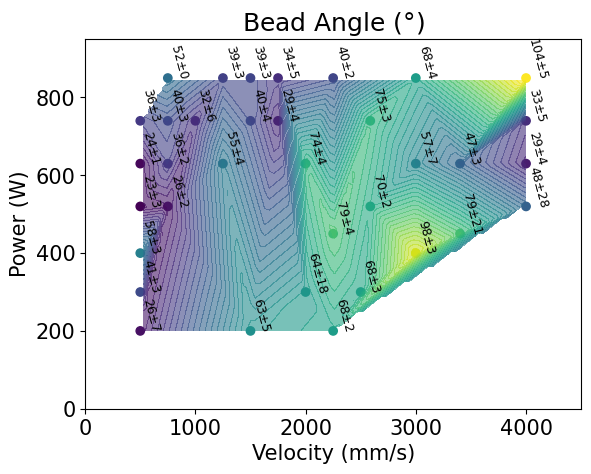

In [ ]:
c = 'Bead Angle'
data = d2[6:].reset_index()
"""
plt.scatter(data['Velocity'],data['Power'],c=data[c])
plt.rcParams.update({'font.size':15})
plt.xlim( 0,45e2)
plt.ylim( 0,950)
plt.ylabel('Power (W)')
plt. xlabel('Velocity (mm/s)')
plt.legend(loc='lower right',fontsize=12)
plt.show()
"""
plt.scatter(data['Velocity'],data['Power'],c=data[c])
plt.rcParams.update({'font.size':15})
plt.xlim( 0,45e2)
plt.ylim( 0,950)
plt.ylabel('Power (W)')
plt. xlabel('Velocity (mm/s)')
x, y=data['Velocity'],data['Power']
x_new, y_new = np.meshgrid(np.linspace(32e1, 45e2, 100),np.linspace(0, 950, 100))
fs,ps = 11,15
s=15
cmap = 'viridis'
norm = matplotlib.colors.Normalize(vmin=0, vmax=25e1)
z=data[c]
plt.scatter(x,y,c=z,cmap=cmap,s=ps)
for p in range(len(data)):
  plt.text(x[p],y[p],str(round(z[p]))+"±"+str(round(data['std'][p])),rotation=-75,size=9)
z_interp = griddata((x, y), z, (x_new, y_new), method='linear')
plt.contourf(x_new, y_new, z_interp, 50, cmap=cmap, alpha=0.6)
plt.ylabel('Power (W)')
plt.xlabel('Velocity (mm/s)')
plt.title('Bead Angle ($\degree$)')
plt.yticks(size=s)
plt.xticks(size=s)
plt.show()

In [ ]:
#width_top_mean	width_quarter_mean	width_half_mean	width_3quarter_mean	avg_width_mean	widest_width_mean	num

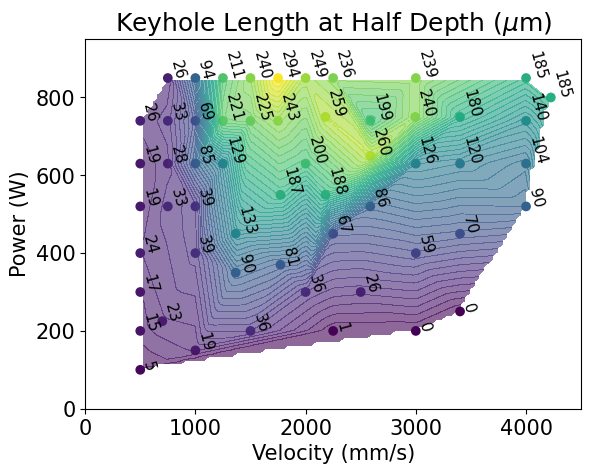

In [ ]:
c = 'width_half_mean'

plt.scatter(data4['V'],data4['P'],c=data4[c])
plt.rcParams.update({'font.size':15})
plt.xlim( 0,45e2)
plt.ylim( 0,950)
plt.ylabel('Power (W)')
plt. xlabel('Velocity (mm/s)')
x, y=data4['V'],data4['P']
x_new, y_new = np.meshgrid(np.linspace(32e1, 45e2, 100),np.linspace(0, 950, 100))
fs,ps = 11,15
s=15
cmap = 'viridis'
norm = matplotlib.colors.Normalize(vmin=0, vmax=25e1)
z=data4[c]
plt.scatter(x,y,c=z,cmap=cmap,s=ps)
for p in range(len(data4)):
  plt.text(x[p],y[p],round(z[p]),rotation=-75,size=fs)
z_interp = griddata((x, y), z, (x_new, y_new), method='linear')
plt.contourf(x_new, y_new, z_interp, 50, cmap=cmap, alpha=0.6)
plt.ylabel('Power (W)')
plt.xlabel('Velocity (mm/s)')
plt.title('Keyhole Length at Half Depth ($\mu$m)')
plt.yticks(size=s)
plt.xticks(size=s)
plt.show()



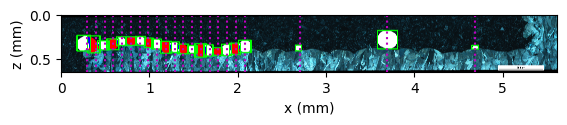

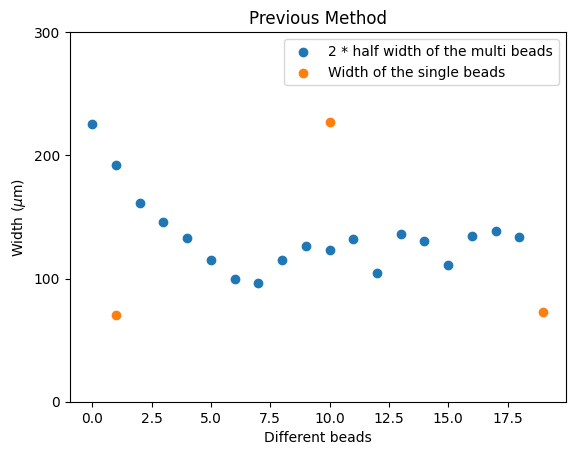

In [ ]:
#@title 3c Cross sectional view - locate the centerline for each multi beads  (NOT USED ANYMORE)
number_of_multi_beads_1 = 13 #150 um
number_of_multi_beads_2 = 19 #100 um
number_of_multi_beads_3 = 21 #90 um

hatch_spacing_1 = 150
hatch_spacing_2 = 100
hatch_spacing_3 = 90

starting_point = 15170
shrinkage = 0.99


plt.imshow(output_image_rgb)
points = np.arange(starting_point - hatch_spacing_2 * scale * shrinkage * 18, starting_point + 1, hatch_spacing_2 * scale * shrinkage)
points2 = np.arange(starting_point + 630 * scale * shrinkage, starting_point + 2630 * scale * shrinkage + 1, 1000 * scale * shrinkage)
plt.vlines(points[:], 0, np.shape(img)[0]-1, color='m', linestyles='dotted')
plt.vlines(points2[:],0, np.shape(img)[0]-1, color='m', linestyles='dotted')
#plt.vlines(np.array(boundaries)[:,0],0,np.shape(img)[0], color='green')
#plt.vlines(np.array(boundaries)[:,1],0,np.shape(img)[0], color='green')

xarray = np.array([0,1,2,3,4,5])
yarray = np.array([0,0.5])
plt.xticks(xarray * scale * 1e3, xarray)
plt.yticks(yarray * scale * 1e3, yarray)

plt.ylabel('z (mm)')
plt.xlabel('x (mm)')

plt.savefig('drive/My Drive/Research/Figures for balling/fig2.tif',dpi=600)
plt.show()

#@title 3d Cross sectional view - the multi beads
beads = pd.DataFrame([np.array(boundaries)[:,0],
                      np.hstack((points,points2))-np.array(boundaries)[:,0],
                      np.hstack((points,points2)),
                      np.array(boundaries)[:,1]-np.hstack((points,points2)),
                      np.array(boundaries)[:,1]
                     ],index=['left','l-m','mid','m-r','right']).T
plt.scatter(np.arange(19),beads['l-m'][:19]*2,label='2 * half width of the multi beads')
plt.scatter([1,10,19],beads['l-m'][19:23]+beads['m-r'][19:23],label = 'Width of the single beads')

yarray = np.array([0,100,200,300])
plt.yticks(yarray * scale, yarray)
plt.ylabel('Width ($\mu$m)')
plt.xlabel('Different beads')

plt.legend()